In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [345]:
df = pd.read_csv('../data/data.csv')

In [346]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [347]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [348]:
df.dropna(axis=1, inplace=True)  # drop columns with NaN
df.iloc[:, 1] = df.iloc[:, 1].map({'M': 1, 'B': 0})  # map labels to 1/0
y = df.iloc[:, 1].values.astype(int)
X = df.iloc[:, 2:].values

In [349]:

df.shape

(569, 32)

In [350]:
#spliting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [351]:
# Standardize
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


In [352]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

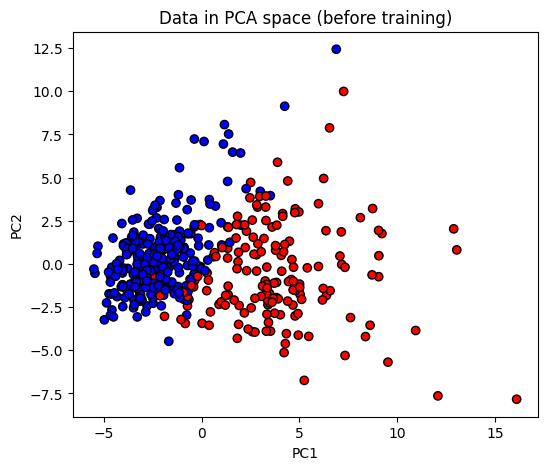

In [353]:
plt.figure(figsize=(6, 5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.bwr, edgecolors='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data in PCA space (before training)")
plt.show()

In [354]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost_logistic_reg(X, y, w, b, lambda_=1):
    m, n = X.shape
    epsilon = 1e-8
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i + epsilon) - (1-y[i])*np.log(1 - f_wb_i + epsilon)
    cost /= m
    reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)
    return cost + reg_cost

In [355]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
        dj_db += err_i
    dj_dw /= m
    dj_db /= m
    dj_dw += (lambda_ / m) * w
    return dj_db, dj_dw

In [356]:
def gradient_descent_logistic_reg(X, y, w_in, b_in, alpha, num_iters, lambda_=1):
    w = w_in.copy()
    b = b_in
    J_history = []
    w_history = []
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic_reg(X, y, w, b, lambda_)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i<100000:      # prevent resource exhaustion 
            cost =  compute_cost_logistic_reg(X, y, w, b, lambda_)
            J_history.append(cost)

        # Optional: print cost every 100 iterations
        if i % 100 == 0:
            w_history.append(w)
            print(f"Iteration {i:4d}: Cost {float(J_history[-1]):8.2f}")
    return w, b, J_history, w_history

def predict(X, w, b):
    probs = sigmoid(np.dot(X, w) + b)
    return (probs >= 0.5).astype(int)

In [357]:
w = np.zeros(X_train_pca.shape[1])
b = 0
w, b, j_hist, w_hist = gradient_descent_logistic_reg(
    X_train_pca, y_train, w, b, alpha=0.01, num_iters=1000
)

Iteration    0: Cost     0.67
Iteration  100: Cost     0.27
Iteration  200: Cost     0.21
Iteration  300: Cost     0.19
Iteration  400: Cost     0.18
Iteration  500: Cost     0.17
Iteration  600: Cost     0.16
Iteration  700: Cost     0.16
Iteration  800: Cost     0.16
Iteration  900: Cost     0.15


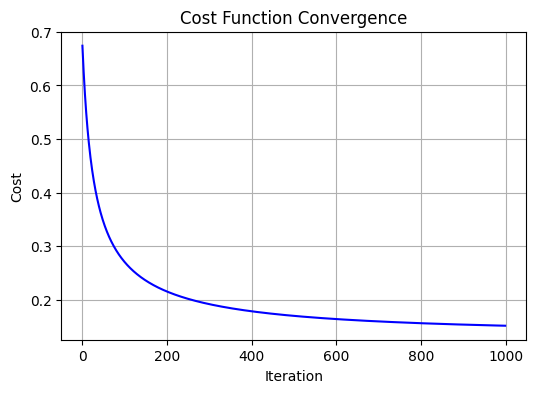

In [358]:
plt.figure(figsize=(6,4))
plt.plot(range(len(j_hist)), j_hist, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

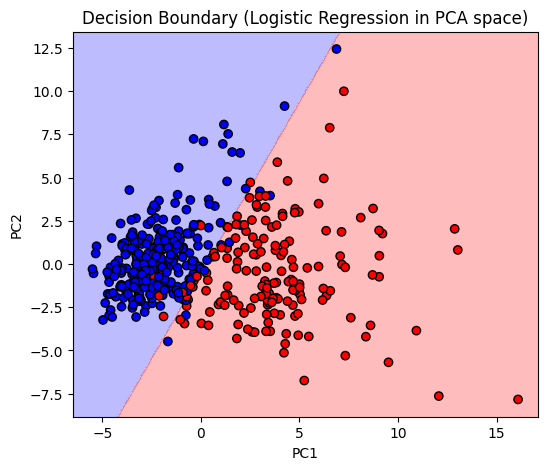

In [359]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid_points, w, b)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.bwr, edgecolors='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Decision Boundary (Logistic Regression in PCA space)")
plt.show()

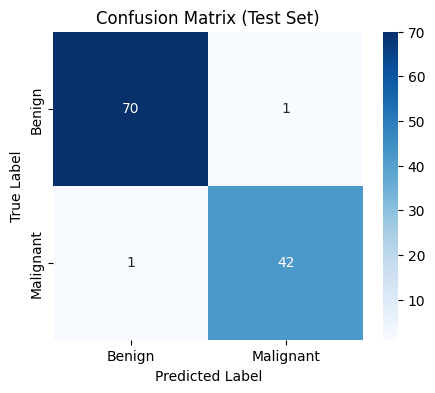

In [360]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [361]:
y_pred_train = predict(X_train_pca, w, b)
train_acc = np.mean(y_pred_train == y_train) * 100
y_pred_test = predict(X_test_pca, w, b)
test_acc = np.mean(y_pred_test == y_test) * 100
print(f"Training Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")

Training Accuracy: 94.29%
Test Accuracy: 99.12%
